### Import Library

In [1]:
import math
import numpy as np
import random

## Decode Chromosome
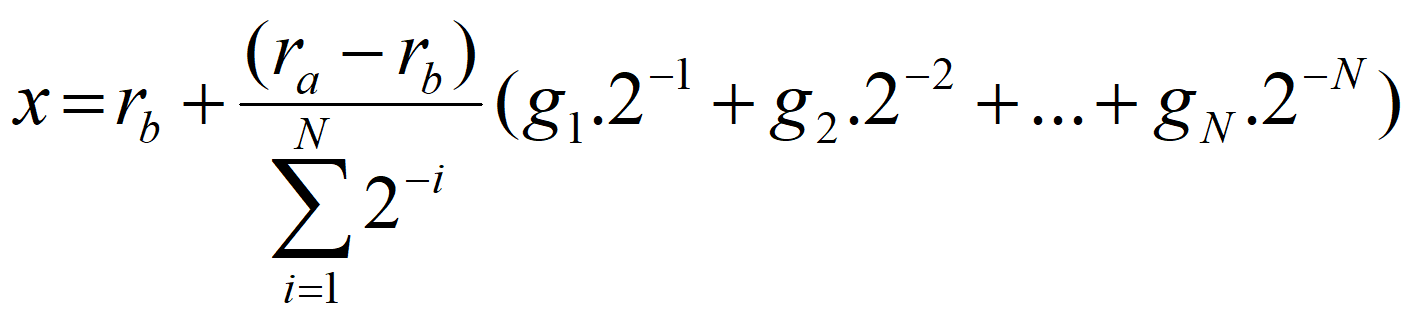

In [2]:
def sigma2(arrX):
  result = 0
  i = -1
  for gen in arrX:
    result += (gen * pow(2, i))
    i -= 1
  
  return result

def decodeChromosome(arrX):
  upperRange = 5
  lowerRange = -5
  base = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  result = lowerRange + (upperRange - lowerRange) * sigma2(arrX) / sigma2(base)
  return result

# decodeChromosome([1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

## Fitness Calculation
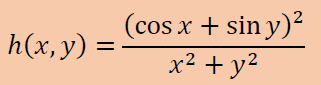

In [3]:
def h(x1, x2):
  return pow(math.cos(x1) + math.sin(x2), 2) / (pow(x1, 2) + pow(x2, 2))

def f(x1, x2):
  # a = 0.01
  a = 0.01
  return 1 / (h(x1, x2) + a)

def fitness(arrChrom):  
  # decode x1 and x2
  x1 = decodeChromosome(arrChrom[0:10])
  x2 = decodeChromosome(arrChrom[10:20])

  return f(x1, x2)

# fitness([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0])

## Parent Selection

In [4]:
def rouletteWheel(population):
  # total population fitness
  populationFitness = sum([individual[1] for individual in population])

  # create probability each individual
  individualProbabilities = [individual[1] / populationFitness for individual in population]

  # select 50 parent based on roulette wheel
  idx = [i for i in range(100)]
  selected = np.random.choice(idx, 50, p = individualProbabilities)
  result = [population[i] for i in selected]
  return result


## Crossover (One Point Recombination)

In [5]:
def onePointRecombination(population):
  # Pc = 0.9
  pc = 0.9
  result = []
  for i in range(0, 50, 2):
    if random.random() <= pc:
      T = random.randint(1, 19)
      # child 1
      result.append(population[i][0][0:T] + population[i + 1][0][T:20])
      # child 2
      result.append(population[i + 1][0][0:T] + population[i][0][T:20])
    else:
      result.append(population[i][0])
      result.append(population[i + 1][0])

  return result

## Mutation

In [6]:
def mutation(arrChrom):
  Pm = 0.1
  result = []
  for gen in arrChrom:
    if random.random() <= Pm:
      result.append(gen ^ 1)
    else:
      result.append(gen)

  return result

## New Population

In [7]:
def newPopulation(oldPop, newPop):
  # find all fitness in newPop
  newPopWithFit = [[chrom, fitness(chrom)] for chrom in newPop]
  newPopWithFit = sorted(newPopWithFit, key=lambda l:l[1], reverse=False)

  # sort oldPop ascending by fitness
  oldPop = sorted(oldPop, key=lambda l:l[1], reverse=False)

  # elitisme, memasukan kromosom yang lebih baik dari populasi sebelumnya
  result = oldPop.copy()
  for i in range(100):
    while (len(newPopWithFit) > 0):
      if newPopWithFit[0][1] > oldPop[i][1]:
        result[i] = newPopWithFit[0]
        newPopWithFit.pop(0)
        break;
      else:
        newPopWithFit.pop(0)

  return result

## Main


---

Data structure for population:

`[[chromosome, fitness]]`

chromosome: array[20] of integer

fitness: real

`[`
  
>`[[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], 35.0],`

>`[[0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0], 6.35],`

>`[[1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0], 1.34]`

`]`

### Create Population (Generation 0)

In [8]:
def createChromosome():
  return np.random.randint(0, 2, 20).tolist()

population = []
for i in range(100):
  chromosome = createChromosome()
  population.append([chromosome, fitness(chromosome)])

### Generation Change

In [9]:
def printStat(population):
  maxFit = 0
  chrom = []
  sumFit = 0
  for individual in population:
    sumFit += individual[1]
    if individual[1] > maxFit:
      maxFit = individual[1]
      chrom = individual[0]
    
  print("Best chromosome: ")
  print(chrom)
  x = decodeChromosome(chrom[0:10])
  y = decodeChromosome(chrom[10:20])
  print("x =", x)
  print("y =", y)
  print('h(x, y) = {0:.32f}'.format(h(x, y)))
  print("Fitness:", maxFit)
  print("sumFit:", sumFit)

  return x, y

In [10]:
for i in range(100):
  # print("Generasi", i + 1)
  # parent selection
  selectedParent = rouletteWheel(population)
  # print("1. Selected parent:")
  # print(selectedParent)
  
  # crossover
  # print("2. Crossover:")
  child = onePointRecombination(selectedParent)
  # print(child)

  # mutation
  # print("3. Mutation:")
  child = [mutation(chrom) for chrom in child]
  # print(child)

  # new population
  # print("4. New population:")
  population = newPopulation(population, child)
  # print(population)

  # print()

### Optimal Solution

In [11]:
x, y = printStat(population)

Best chromosome: 
[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
x = -3.142717497556207
y = 1.5689149560117306
h(x, y) = 0.00000000000010480395191425220860
Fitness: 99.99999999895196
sumFit: 9999.999943467597


In [12]:
print('h(x, y) = {0:.32f}'.format(h(x, y)))
#WolframAlpha
print('h(x, y) = {0:.32f}'.format(h(4.97936, 3.40857)))
print('h(x, y) = {0:.32f}'.format(h(1.11364, -0.457153)))
print('h(x, y) = {0:.32f}'.format(h(0.789652, -0.781144)))
print('h(x, y) = {0:.32f}'.format(h(-0.881389, -0.689407)))

h(x, y) = 0.00000000000010480395191425220860
h(x, y) = 0.00000000000102279644306258868804
h(x, y) = 0.00000000000614916077458703378100
h(x, y) = 0.00000000000004364932388922833858
h(x, y) = 0.00000000000005078228094907681850
